# 0.引入所需模組與必要的資料集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
test_data = pd.read_csv('../../data/kaggle_titanic/test.csv')
train_data = pd.read_csv('../../data/kaggle_titanic/train.csv')

# 1.查看資料

In [3]:
def DatasetsInfo(train_data,test_data):
    train_data.info()
    print("-" * 40)
    test_data.info()
DatasetsInfo(train_data,test_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [4]:
print(train_data.describe())
print("-" * 40)
print(train_data.describe(include=['O']))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
----------------------------------------
                               Name   Se

In [5]:
def DatasetMissingPercentage(data):
    return pd.DataFrame({'DataMissingPercentage':data.isnull().sum() * 100 / len(train_data)})

DatasetMissingPercentage(train_data)

,DataMissingPercentage
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [6]:
DatasetMissingPercentage(test_data)

,DataMissingPercentage
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,9.652076
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.112233
Cabin,36.700337


In [7]:
def DatasetUniquePercentage(data):
    return pd.DataFrame({'percent_unique':data.apply(lambda x: x.unique().size/x.size*100)})

DatasetUniquePercentage(train_data)

,percent_unique
PassengerId,100.000000
Survived,0.224467
Pclass,0.336700
Name,100.000000
Sex,0.224467
Age,9.988777
SibSp,0.785634
Parch,0.785634
Ticket,76.430976
Fare,27.833895


In [8]:
DatasetUniquePercentage(test_data)

,percent_unique
PassengerId,100.000000
Pclass,0.717703
Name,100.000000
Sex,0.478469
Age,19.138756
SibSp,1.674641
Parch,1.913876
Ticket,86.842105
Fare,40.669856
Cabin,18.421053


# 2.分析資料

## 基礎分析

In [9]:
print('Id is unique.') if train_data.PassengerId.nunique() == train_data.shape[0] else print('oops')
print('Train and test sets are distinct.') if len(np.intersect1d(train_data.PassengerId.values, test_data.PassengerId.values))== 0 else print('oops')#0表示train,test dataset資料一致
#查看資料是否有nan並設置datasetHasNan flag   
if train_data.count().min() == train_data.shape[0] and test_dataset.count().min() == test_dataset.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    nas = pd.concat([train_data.isnull().sum(), test_data.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

Id is unique.
Train and test sets are distinct.
Nan in the data sets
          Train Dataset  Test Dataset
Age                 177          86.0
Cabin               687         327.0
Embarked              2           0.0
Fare                  0           1.0


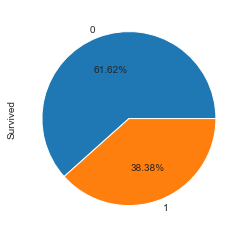

In [10]:
#存活率 
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

## 相關性分析

In [11]:
# Sex vs Survived
print(train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Class vs Survived，存活率高到低，P1,P2,P3  
print(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Sex and Class vs Survived
print(train_data[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# SibSp vs Survived
print(train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Parch vs Survived
print(train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Family vs Survived
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
print(train_data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()
# Embark vs Survived
print(train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print()

      Sex  Survived
0  female  0.742038
1    male  0.188908

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

      Sex  Pclass  Survived
0  female       1  0.968085
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

   Family  Survived
3       3  0.724138
2       2  0.578431
1       1  0.552795
6       6  0.333333
0       0  0.303538
4       4  0.200000
5       5  0.136364
7       7  0.000000
8      10  0.000000

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957



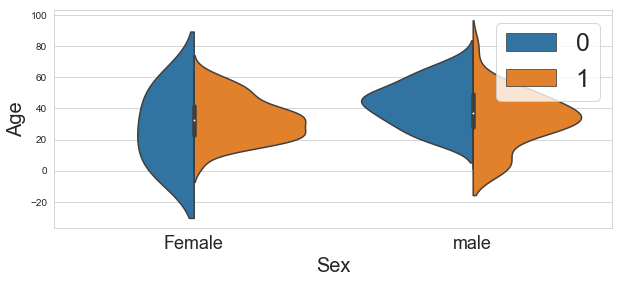

In [12]:
#年齡跟生存率關係  
ax = plt.figure(figsize=(10,4)).add_subplot(111)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data.dropna(), split=True)
ax.set_xlabel('Sex',size=20)
ax.set_xticklabels(['Female','male'], size=18)
ax.set_ylabel('Age',size=20)
ax.legend(fontsize=25,loc='best')

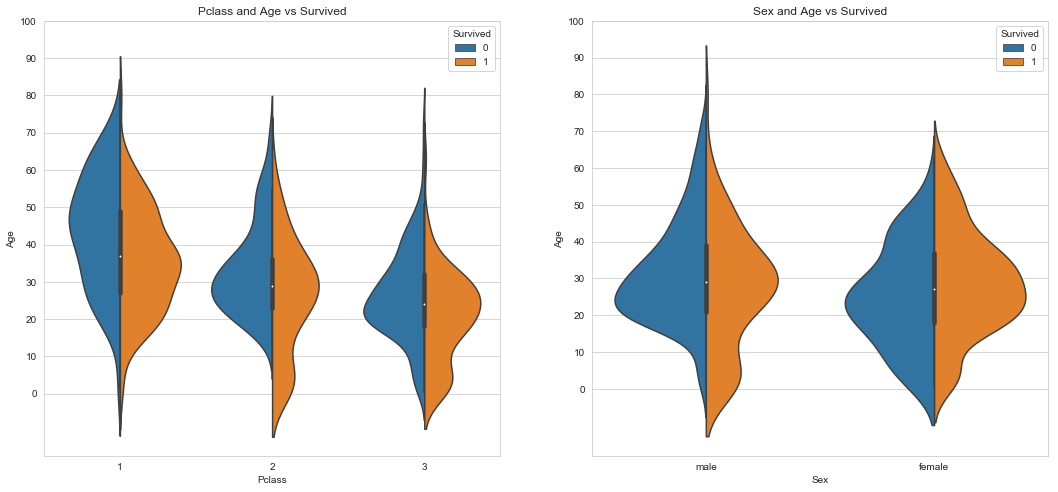

In [13]:
#階級跟年齡對生存率，性別跟年齡對生存率
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Train Features


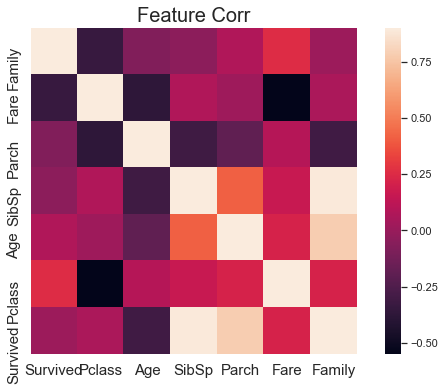

In [14]:
def FeatureCorreate(datasets,dropData):
    sns.set(context="paper", font="monospace")
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(10,6))
    train_corr = datasets.drop(dropData,axis=1).corr()
    sns.heatmap(train_corr, ax=ax, vmax=.9, square=True)
    ax.set_xticklabels(train_corr.index, size=15)
    ax.set_yticklabels(train_corr.columns[::-1], size=15)
    ax.set_title('Feature Corr', fontsize=20)
print("Train Features")
FeatureCorreate(train_data,'PassengerId')

# 3.特徵工程

In [15]:
def status(feature):
    print('Processing', feature, ': ok')

In [16]:
#一樣移除生存欄位合併資料集
targets = train_data.Survived
train_data.drop(['Survived'], 1, inplace=True)

combined = train_data.append(test_data)
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId'], inplace=True, axis=1)

In [17]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Family      891 non-null float64
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


## title處理

In [18]:
titles = set()
for name in combined['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [19]:
titles

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [20]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [21]:
combined = get_titles()

Processing Title : ok


In [22]:
combined.describe(include=['O'])#title少一個

,Cabin,Embarked,Name,Sex,Ticket,Title
count,295,1307,1309,1309,1309,1308
unique,186,3,1307,2,929,6
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343,Mr
freq,6,914,2,843,11,757


In [23]:
combined[combined['Title'].isnull()]

,Age,Cabin,Embarked,Family,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket,Title
1305,39.0,C105,C,NaN,108.9,"Oliva y Ocana, Dona. Fermina",0,1,female,0,PC 17758,NaN


## age處理

In [24]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [25]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [26]:
combined = process_age()

Processing age : ok


In [27]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Family      891 non-null float64
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Ticket      1309 non-null object
Title       1308 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 122.8+ KB


## name 處理

In [28]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

In [29]:
combined = process_names()

Processing names : ok


In [30]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age              1309 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
Family           891 non-null float64
Fare             1308 non-null float64
Parch            1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Ticket           1309 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
dtypes: float64(3), int64(3), object(4), uint8(6)
memory usage: 110.0+ KB


## fare處理

In [31]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [32]:
combined = process_fares()

Processing fare : ok


## embarked處理

In [33]:
def process_embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [34]:
combined = process_embarked()

Processing embarked : ok


In [35]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age              1309 non-null float64
Cabin            295 non-null object
Family           891 non-null float64
Fare             1309 non-null float64
Parch            1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Ticket           1309 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
dtypes: float64(3), int64(3), object(3), uint8(9)
memory usage: 103.6+ KB


## cabin 處理

In [36]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [37]:
def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [38]:
combined = process_cabin()

Processing cabin : ok


In [39]:
combined.info()#只剩family，不過sex,ticket還是object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
Age              1309 non-null float64
Family           891 non-null float64
Fare             1309 non-null float64
Parch            1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Ticket           1309 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint

## sex處理

In [40]:
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

In [41]:
combined = process_sex()

Processing Sex : ok


## pclass 處理 

In [42]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

In [43]:
combined = process_pclass()

Processing Pclass : ok


## ticket處理

In [44]:
del combined['Ticket']

In [45]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
Age              1309 non-null float64
Family           891 non-null float64
Fare             1309 non-null float64
Parch            1309 non-null int64
Sex              1309 non-null int64
SibSp            1309 non-null int64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_U          1309 non-null uint8


In [46]:
'''
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

'''

"\ndef cleanTicket(ticket):\n    ticket = ticket.replace('.', '')\n    ticket = ticket.replace('/', '')\n    ticket = ticket.split()\n    ticket = map(lambda t : t.strip(), ticket)\n    ticket = list(filter(lambda t : not t.isdigit(), ticket))\n    if len(ticket) > 0:\n        return ticket[0]\n    else: \n        return 'XXX'\n\n"

In [47]:
'''
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))
'''

"\ntickets = set()\nfor t in combined['Ticket']:\n    tickets.add(cleanTicket(t))\n"

In [48]:
'''
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    # Extracting dummy variables from tickets:
    #combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    status('Ticket')
    return combined

'''

"\ndef process_ticket():\n    \n    global combined\n    \n    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)\n    def cleanTicket(ticket):\n        ticket = ticket.replace('.','')\n        ticket = ticket.replace('/','')\n        ticket = ticket.split()\n        ticket = map(lambda t : t.strip(), ticket)\n        ticket = filter(lambda t : not t.isdigit(), ticket)\n        if len(ticket) > 0:\n            return ticket[0]\n        else: \n            return 'XXX'\n    # Extracting dummy variables from tickets:\n    #combined['Ticket'] = combined['Ticket'].map(cleanTicket)\n    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')\n    combined = pd.concat([combined, tickets_dummies], axis=1)\n    combined.drop('Ticket', inplace=True, axis=1)\n    status('Ticket')\n    return combined\n\n"

In [49]:
'''
combined = process_ticket()
'''

'\ncombined = process_ticket()\n'

## family處理

In [50]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

In [51]:
combined = process_family()

Processing family : ok


In [52]:
combined.shape

(1309, 31)

In [53]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 31 columns):
Age              1309 non-null float64
Family           891 non-null float64
Fare             1309 non-null float64
Parch            1309 non-null int64
Sex              1309 non-null int64
SibSp            1309 non-null int64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_U          1309 non-null uint8


In [61]:
del combined['Family']

In [62]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 30 columns):
Age              1309 non-null float64
Fare             1309 non-null float64
Parch            1309 non-null int64
Sex              1309 non-null int64
SibSp            1309 non-null int64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_U          1309 non-null uint8
Pclass_1         1309 non-null uint8
P

# 4.建模,訓練,預測

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [64]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [65]:
def recover_train_test_target():
    global combined
  
    targets = pd.read_csv('../../data/kaggle_titanic/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [66]:
train, test, targets = recover_train_test_target()

## Feature selection

In [67]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [68]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

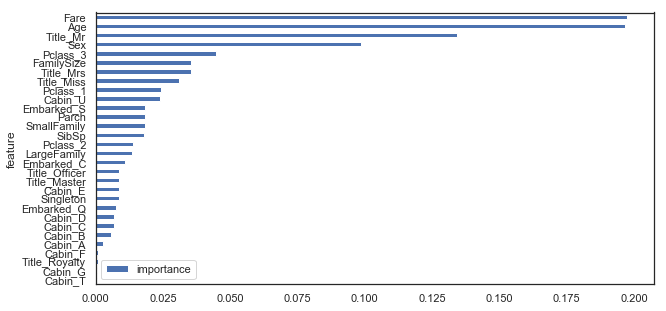

In [69]:
features.plot(kind='barh', figsize=(10, 5))

In [71]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

(891, 7)


In [72]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 7)


## Models

In [73]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [75]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.809218816882268
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8148180341281097
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8126083636813703
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8260350161200118


In [76]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

# 5.產生csv上傳

In [78]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('../../data/kaggle_titanic/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('./SelectFromModelubmissing.csv', index=False)


# 6.參考資料

https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html